## **Strategies for Effective Missing Value Handling in Rain Prediction**

Null value analysis is a process in data analysis where the presence and impact of missing or null values in a dataset are examined. Null values, often represented as "NaN" (Not a Number) or "null" in various programming languages, can occur for various reasons, such as data collection errors, incomplete records, or intentional omission.

Here are some key aspects of null value analysis:

**Identification of Null Values:** Start by identifying null values in the dataset. This involves checking each column or variable for missing values and understanding how they are represented in the data.


**Quantifying Null Values:** Determine the extent of missing data by calculating the percentage of null values in each column. This helps prioritize which variables may require special attention.

**Understanding Patterns:** Analyze if the null values occur randomly or follow a pattern. For example, missing data might be more prevalent in certain time periods, for specific categories, or in certain geographic regions.

**Reasons for Missing Data:** Investigate the reasons for missing data. It could be due to data entry errors, system failures during data collection, non-response in surveys, or other factors. Understanding the reasons can help in deciding the appropriate handling strategy.

**Impact on Analysis:** Assess the impact of missing data on the overall analysis. Depending on the nature and extent of missing values, it may be necessary to adjust the analysis approach or impute missing values using statistical techniques.


**Handling Null Values:** Decide on a strategy for handling null values. Common approaches include removing rows or columns with missing data, imputing missing values based on statistical methods, or using advanced imputation techniques.

**Documentation:** Document the steps taken to handle null values, as well as any assumptions made during the analysis. This is crucial for transparency and reproducibility of the analysis.

**Imputation Techniques:** If imputation is necessary, consider various imputation techniques such as mean imputation, median imputation, regression imputation, or machine learning-based imputation methods.

**Sensitivity Analysis:** Conduct sensitivity analysis to understand how different imputation methods or handling strategies impact the results of your analysis. This helps in gauging the robustness of the conclusions drawn.
Communication:

Clearly communicate the results of the null value analysis to stakeholders, highlighting any limitations introduced by missing data and the steps taken to address them.

In summary, null value analysis is a crucial step in the data analysis process to ensure the integrity and reliability of results. It involves identifying, quantifying, understanding, and appropriately handling missing data in a systematic manner.


This paper https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00516-9  discusses various aspects of handling missing data, particularly focusing on patterns and mechanisms of missingness, approaches for dealing with missing values, performance metrics for missing data imputation, and comparisons of different methodologies.

In this analysis, we utilized the "Rain in Australia" dataset, which is readily available at https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
weatherAUS = pd.read_csv("/content/sample_data/weatherAUS.csv")

In [3]:
# Displaying information the dataset structure
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Displaying descriptive statistics for all columns
weatherAUS.describe( include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


# **Display the count and percentage of missing values for each column**


<ipython-input-16-e2aa14fbf8da>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


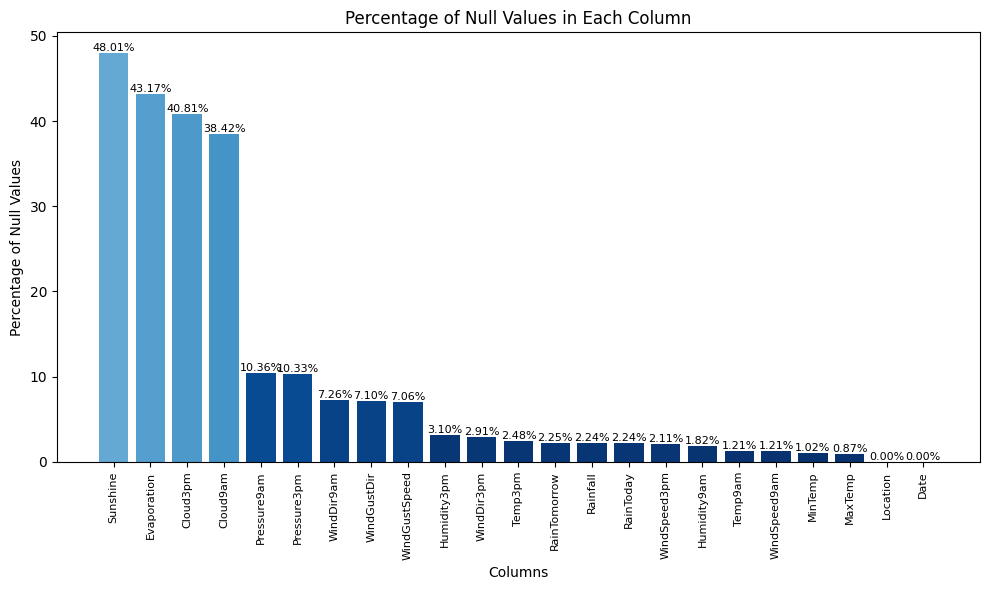

In [ ]:
# Calculate the percentage of null values in each column
columns_Nullvalue = weatherAUS.isnull().mean().mul(100).round(2)

# Sort the DataFrame by the percentage of null values in descending order
columns_Nullvalue_sorted = columns_Nullvalue.sort_values(ascending=False)

cmap = plt.cm.get_cmap('Blues')
colors = cmap(1 - columns_Nullvalue_sorted / 100)  # Invert the percentages and map to colors

# Create a bar chart with the bars displayed from largest to smallest and color-coded
plt.figure(figsize=(10, 6))
bars = plt.bar(columns_Nullvalue_sorted.index, columns_Nullvalue_sorted, color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.tight_layout()
plt.show()


##**Understanding Missing Data Patterns and Mechanisms**

#**Missing Data Patterns**

Missing data patterns refer to the arrangements or structures of missing and observed values within a dataset. They provide insights into the nature of missingness, aiding in the development of strategies to handle or impute missing data. Three commonly discussed patterns are:

**Univariate Pattern:**

Definition: In an univariate missing data pattern, only one variable in the dataset exhibits missing values.

Occurrence: Univariate patterns are relatively uncommon and are typically associated with specific experimental studies.

Example: In a clinical trial, a specific measurement variable may have missing values due to technical errors or participant non-compliance.


**Monotone Pattern:**

Definition: A monotone missing data pattern occurs when the variables in the dataset can be arranged to reflect a monotonic trend in missing values.

Occurrence: Monotone patterns are often observed in longitudinal studies, where participants drop out and do not return.

Advantage: Easier to handle, as missing values exhibit observable patterns.

Example: In a study tracking individuals over time, missing data may form a consistent pattern due to participants dropping out.

**Non-Monotone Pattern:**

Definition: A non-monotone missing data pattern occurs when the missingness of one variable does not influence the missingness of any other variables in the dataset.

Occurrence: The missingness of one variable is independent of the missingness of other variables.

Example: In a survey dataset, the missingness of income information may not impact the missingness of other demographic variables.

# **Missing Data Mechanisms:**

Missing data mechanisms refer to the processes or conditions that lead to the occurrence of missing values in a dataset. Understanding these mechanisms is crucial as they influence the assumptions underlying various methods used to handle missing data in statistical analyses. Missing data can be defined based on three main mechanisms:

**Missing Completely at Random (MCAR):**

Definition: The probability of a value being missing is unrelated to both observed and missing data.

Assumption: The missingness occurs randomly throughout the dataset, with no systematic pattern.

Representation: Denoted by a missing value matrix, R, where the probability of missingness is not influenced by any variables in the dataset.

**Missing At Random (MAR):**

Definition: The probability of a value being missing depends only on the observed data and is not related to the missing data itself.

Assumption: The missingness can be explained by other variables in the dataset.

Representation: The association between missingness in R and the dataset Y is captured by a vector of values, q.

**Missing Data Not At Random (MNAR):**

Definition: The missingness is related to the missing values themselves, even after considering observed data.

Assumption: Implies a systematic difference between missing and observed data.

Representation: The probability of missingness is influenced by the actual missing values in the dataset.

To define missingness, let Y be a matrix of the entire dataset, decomposed into observed (Yo) and missing data (Ym). The missing value matrix R is introduced to represent the missingness, and the vector q indicates the association between missingness in R and the dataset Y. The missing data mechanisms are thus characterized by the probability of whether a value is observed or missing, influencing the development and application of methods to handle missing data in statistical analyses.





/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


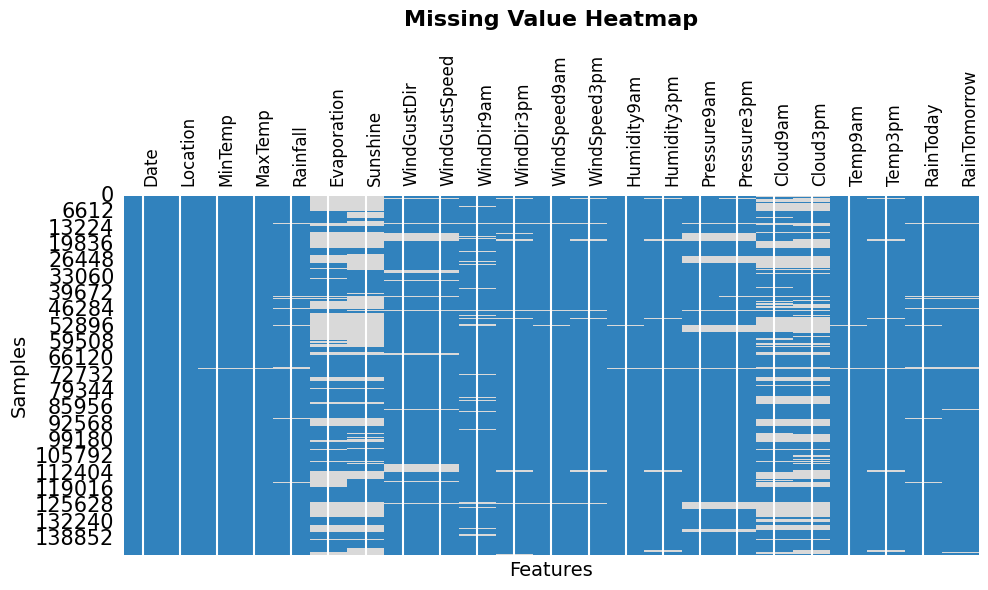

In [ ]:
# Create heatmap of missing values
fig, ax = plt.subplots(figsize=(10, 6))

# Generate matrix plot
msno.matrix(weatherAUS, ax=ax, fontsize=12, figsize=(8, 6), sparkline=True)

# Customize the color of the missing value heatmap
cmap = 'tab20c'
sns.heatmap(data=weatherAUS.isnull(), cmap=cmap, cbar=False, ax=ax)

ax.set_title('Missing Value Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Samples', fontsize=14)

fig.tight_layout()
plt.show()





# **Display the count and percentage of missing values for each column**

The summary of missing data you've provided offers an informative snapshot for analyzing both the pattern of missingness across different variables in your dataset and possibly inferring the underlying mechanisms. Let's break this down:

**Missing Data Patterns**

The distribution of missing data across different columns varies significantly, indicating a complex pattern of missingness. The highest percentages of missing data are observed in variables like Sunshine, Evaporation, Cloud3pm, and Cloud9am, suggesting that certain types of data (perhaps related to weather conditions) are more prone to missingness. The pattern does not appear to be univariate, as multiple variables are affected, nor strictly monotone, since the missingness does not follow a clear order where the presence or absence of data for one variable directly influences the missingness of data in subsequent variables. However, it could be argued that there's a **non-monotone pattern**, given the variation in missing percentages across variables, indicating the absence of a straightforward relationship between the missingness of one variable and others.

**Inferring Missing Data Mechanisms**

To infer the mechanism of missing data (i.e., MCAR, MAR, or MNAR), we need to consider the nature of the variables with high missingness and any potential reasons behind their absence:

MCAR (Missing Completely at Random): If the missingness of data (such as Sunshine, Evaporation, Cloud3pm) is unrelated to any observed or unobserved data, it could be due to reasons like equipment failure or data entry errors. However, the pattern of missingness, especially with higher rates in specific weather-related variables, suggests that the missing data might not be completely at random.

MAR (Missing at Random): This seems more plausible for your dataset. For example, the missingness in weather-related variables like Sunshine, Evaporation, Cloud3pm, and Cloud9am could be related to other variables in the dataset. Perhaps certain locations or dates (observed data) have higher incidences of missing data due to geographic or seasonal factors that affect the ability to record these measurements.

MNAR (Missing Not at Random): There might be instances of MNAR in the dataset, particularly if the missingness of certain variables is related to the unobserved data itself. For example, if Sunshine data is more likely to be missing on days with certain weather conditions that are not recorded or if the lack of recording is influenced by the actual value that should have been recorded (such as extremely low visibility days leading to missing cloud coverage data).

Given the complexity and variety of missing data, it's likely that a combination of these mechanisms is at play across different variables. The high missing rates in specific weather-related measurements could hint at MAR or MNAR, where the missingness is influenced by factors related to what is being measured or seasonal/weather-related challenges in data collection.

Addressing this missing data will require a nuanced approach, considering the potential mechanisms and employing appropriate techniques for imputation or analysis that can handle the intricacies of these patterns and mechanisms.







In [ ]:
# Check for missing values
missing_values = weatherAUS.isnull().sum()

# Display the count and percentage of missing values for each column
missing_data_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage Missing': (missing_values / len(weatherAUS)) * 100
})

# Sort the summary by the percentage of missing values
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

print('\nMissing Data Summary:')
print(missing_data_summary)



Missing Data Summary:
                      Column  Missing Count  Percentage Missing
Sunshine            Sunshine          69835           48.009762
Evaporation      Evaporation          62790           43.166506
Cloud3pm            Cloud3pm          59358           40.807095
Cloud9am            Cloud9am          55888           38.421559
Pressure9am      Pressure9am          15065           10.356799
Pressure3pm      Pressure3pm          15028           10.331363
WindDir9am        WindDir9am          10566            7.263853
WindGustDir      WindGustDir          10326            7.098859
WindGustSpeed  WindGustSpeed          10263            7.055548
Humidity3pm      Humidity3pm           4507            3.098446
WindDir3pm        WindDir3pm           4228            2.906641
Temp3pm              Temp3pm           3609            2.481094
RainTomorrow    RainTomorrow           3267            2.245978
Rainfall            Rainfall           3261            2.241853
RainToday        

In [ ]:
# Assuming df is your DataFrame
# A simple check for monotonicity could be column-wise non-null count
monotonicity_check = weatherAUS.notnull().cumsum(axis=1).apply(lambda x: x == x.max(), axis=0)
print(monotonicity_check)


        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0       True      True     True     True      True        False     False   
1       True      True     True     True      True        False     False   
2       True      True     True     True      True        False     False   
3       True      True     True     True      True        False     False   
4       True      True     True     True      True        False     False   
...      ...       ...      ...      ...       ...          ...       ...   
145455  True      True     True     True      True        False     False   
145456  True      True     True     True      True        False     False   
145457  True      True     True     True      True        False     False   
145458  True      True     True     True      True        False     False   
145459  True      True     True    False     False        False     False   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3

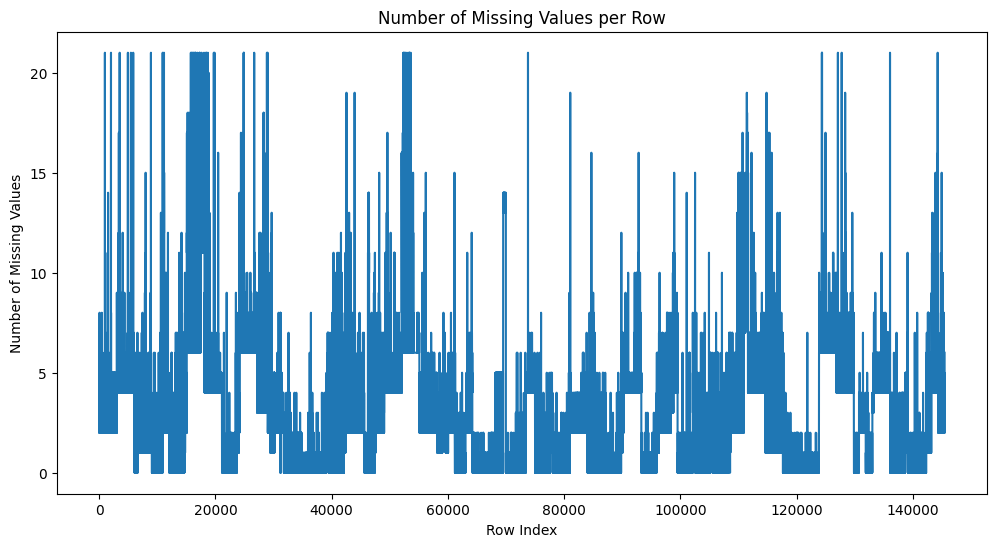

In [ ]:
# Check for missing values
missing_values = weatherAUS.isnull()

# Analyze patterns of missing values
missing_patterns = missing_values.sum(axis=1)
plt.figure(figsize=(12, 6))
plt.plot(missing_patterns)
plt.title('Number of Missing Values per Row')
plt.xlabel('Row Index')
plt.ylabel('Number of Missing Values')
plt.show()


In [ ]:
# Create a new DataFrame to store cumulative sum of missing values
cumulative_missing_sum = pd.DataFrame()

# Iterate through each column and calculate the cumulative sum of missing values
for column in weatherAUS.columns:
    cumulative_missing_sum[column + '_cumsum'] = weatherAUS[column].isnull().cumsum()

# Check if cumulative sum is increasing (monotone) or not (non-monotone)
if np.all(np.diff(cumulative_missing_sum.values, axis=0) >= 0):
    print("Missing data pattern is non-monotone")
else:
    print("Missing data pattern is monotone")



Missing data pattern is non-monotone


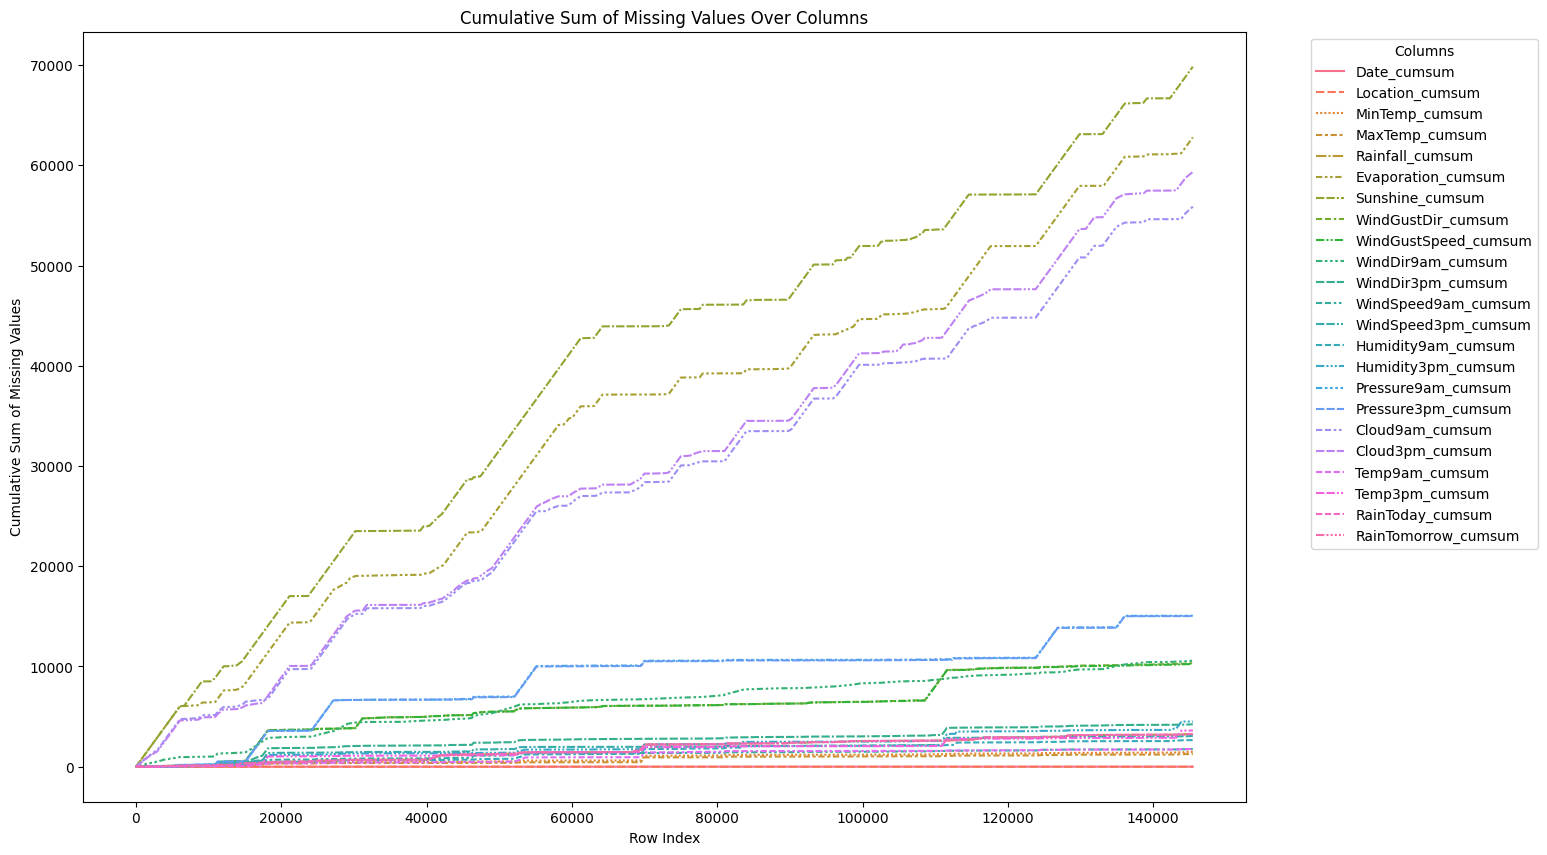

In [ ]:
# Plot the cumulative sum of missing values
plt.figure(figsize=(15, 10))
sns.lineplot(data=cumulative_missing_sum)
plt.title('Cumulative Sum of Missing Values Over Columns')
plt.xlabel('Row Index')
plt.ylabel('Cumulative Sum of Missing Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Columns')
plt.show()


##**Imputation**

In the data preprocessing phase, we often encounter missing values that need to be addressed before further analysis. In this context, one common approach is to use imputation techniques, such as mean and mode imputation, to fill in the missing values. In the provided code snippet, the initial step involves separating numerical and categorical columns in the dataset. For numerical columns, missing values are imputed with the mean of their respective columns, while for categorical columns, mode imputation is applied. The fillna method is employed to fill in missing values, with the mean for numerical columns and the mode for categorical ones. This ensures a more complete dataset for subsequent analyses. The final step displays the information after the imputation process, showing how the missing values have been addressed in both numerical and categorical columns.

In [ ]:
# Display information before imputation
weatherAUS.info()

# Separate numerical and categorical columns
numerical_columns = weatherAUS.select_dtypes(include=['float64']).columns
categorical_columns = weatherAUS.select_dtypes(include=['object']).columns

# Impute missing values with mean for numerical columns
weatherAUS[numerical_columns] = weatherAUS[numerical_columns].fillna(weatherAUS[numerical_columns].mean())

# Impute missing values with mode for categorical columns
weatherAUS[categorical_columns] = weatherAUS[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

# Display information after imputation
weatherAUS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'weatherAUS' is your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Step 1: Preprocess the Dataset
# Drop rows where 'RainTomorrow' is NaN
weatherAUS_cleaned = weatherAUS.dropna(subset=['RainTomorrow'])

# Convert 'RainTomorrow' to binary (0 and 1)
weatherAUS_cleaned['RainTomorrow'] = weatherAUS_cleaned['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = weatherAUS_cleaned.drop('RainTomorrow', axis=1)
y = weatherAUS_cleaned['RainTomorrow']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'bool']).columns

# Step 3: Define a Pipeline
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestClassifier(random_state=42))])

# Step 4: Train and Evaluate the Model
# Train the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


<ipython-input-24-26b07622d24b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherAUS_cleaned['RainTomorrow'] = weatherAUS_cleaned['RainTomorrow'].map({'No': 0, 'Yes': 1})


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     22098
           1       0.78      0.46      0.58      6341

    accuracy                           0.85     28439
   macro avg       0.82      0.71      0.74     28439
weighted avg       0.84      0.85      0.84     28439




Following this step, we are employing diverse imputation techniques exclusively on the numerical columns within the Australian weather dataset. The objective is to gauge their efficacy by evaluating their performance using a variety of metrics.




# **List-wise imputation**

List-wise imputation, also known as complete case analysis, is a method used to handle missing data in a dataset by excluding entire rows with any missing values. In this approach, if a particular observation has any missing value in any of its variables, that entire observation is removed from the dataset. This technique is straightforward and easy to implement, making it a common choice when dealing with missing data.

List-wise imputation is effective when the proportion of missing values is relatively small, and the missingness occurs randomly or is unrelated to the underlying patterns in the data. However, its drawback is that it can lead to a reduction in the sample size, potentially discarding valuable information if the missing data is not completely at random.

While list-wise imputation provides a quick solution to missing data, it is crucial to consider its implications, especially in cases where the missingness might carry important information or when the missing values are not completely random. It is often advisable to assess the characteristics of missing data and choose imputation methods that align with the nature of the missingness and the goals of the analysis.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')


# Convert 'RainToday' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})

# Convert 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Apply list-wise Imputation
weatherAUS_imputed = weatherAUS_imputed.dropna()

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      9059
         1.0       0.75      0.52      0.61      2559

    accuracy                           0.86     11618
   macro avg       0.81      0.73      0.76     11618
weighted avg       0.85      0.86      0.85     11618




# **Forward Fill and Backward Fill Imputations**

**Forward Fill (ffill):**

Forward fill, denoted as ffill in the context of pandas or other data manipulation libraries, is a straightforward imputation technique commonly applied in scenarios where the order of observations holds significance, particularly in time-series data. This method involves filling missing values with the most recent non-null value in the sequence. For example, if a dataset records daily temperature readings and a value is missing for a specific day, forward fill would replace that missing value with the temperature observed on the preceding day. This approach is advantageous in preserving temporal patterns and trends within the data, ensuring a smoother continuation of observed patterns over time. However, it is essential to note that forward fill might propagate errors if the missing value is associated with an anomaly or a sudden change in the data.

**Backward Fill (bfill):**

Contrastingly, backward fill, represented as bfill in pandas or similar libraries, is another imputation technique that fills missing values with the next known non-null value in the sequence. In the context of time-series data, if a value is missing for a specific day, backward fill would substitute that missing value with the temperature recorded on the subsequent day. This method is particularly useful for predictive modeling tasks where future observations may play a crucial role. Backward fill helps prevent lookahead bias by avoiding the use of information from the future when imputing missing values. However, it may not accurately capture sudden real-time changes, and careful consideration is required when applying it to datasets with complex dynamics or irregular patterns.



In the provided scenario, a combination of forward fill (`ffill`) and backward fill (`bfill`) imputation techniques is employed to address missing values in a dataset comprehensively. The process begins by utilizing forward fill to impute null values in the dataset. This involves filling missing values with the most recent non-null values, ensuring that the gaps are filled with the latest available information. Subsequently, any remaining missing values, which were not imputed by the forward fill, are then addressed using backward fill. The backward fill strategy fills these remaining gaps by replacing missing values with the next known non-null values in the sequence.



This dual imputation approach, incorporating both forward and backward fill, aims to harness the strengths of each technique. Forward fill is advantageous in capturing temporal patterns and maintaining the continuity of trends, while backward fill is particularly useful in scenarios where predictive modeling benefits from leveraging future observations. By sequentially applying these imputation methods, the process aims to provide a more complete and robust dataset for subsequent analyses or modeling tasks. Careful consideration of the data's temporal characteristics and the potential implications of each imputation method is essential to ensure the integrity of the imputed dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')


# Convert 'RainToday' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})

# Convert 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Apply forward fill to impute missing values
weatherAUS_imputed.ffill(inplace=True)
weatherAUS_imputed.bfill(inplace=True)


# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22502
         1.0       0.75      0.50      0.60      6590

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



# **K-Nearest Neighbors Imputer**


The KNNImputer, or k-Nearest Neighbors Imputer, is a powerful tool for addressing missing values in numerical datasets. This imputation technique is based on the idea that the missing values in a dataset can be effectively estimated by considering the values of their nearest neighbors. KNNImputer calculates the distance between data points, identifies the k-nearest neighbors for each missing value, and then fills in the missing entry with a weighted average or median of the neighboring values. This approach is particularly useful when dealing with datasets where missing values exhibit a pattern related to the values of other features. By utilizing information from nearby data points, KNNImputer contributes to maintaining the overall integrity of the dataset, ensuring that imputed values are contextually relevant. The choice of the number of neighbors (k) allows for flexibility and customization based on the characteristics of the dataset. KNNImputer is a valuable preprocessing tool in data cleaning and preparation, ultimately enhancing the quality and completeness of datasets for downstream analysis or machine learning applications.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Handle missing values in 'RainToday' and 'RainTomorrow' before conversion
# Option 1: Drop rows with missing 'RainToday' or 'RainTomorrow'
weatherAUS.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns to simplify the example
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Use KNNImputer to handle missing values in numerical columns
imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed
numerical_columns = weatherAUS_imputed.select_dtypes(include=['float64', 'int64']).columns
weatherAUS_imputed[numerical_columns] = imputer.fit_transform(weatherAUS_imputed[numerical_columns])

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow'].astype(int)  # Ensure y is integer type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21897
           1       0.76      0.50      0.60      6261

    accuracy                           0.85     28158
   macro avg       0.82      0.73      0.76     28158
weighted avg       0.85      0.85      0.84     28158



# **Simple Imputer**

The SimpleImputer from scikit-learn serves as a fundamental tool for addressing missing values in numerical datasets. Its simplicity lies in offering straightforward imputation strategies, such as replacing missing values with the mean, median, most frequent, or a constant value. In this context, the code employs the 'mean' strategy, which replaces missing entries with the average value of each respective numerical column. This approach provides a quick and efficient solution to handling missing data, ensuring that the dataset is sufficiently complete for subsequent analysis or modeling. While lacking the nuanced sophistication of more complex imputation methods, SimpleImputer is particularly useful for scenarios where a basic and easily interpretable imputation strategy suffices.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Handle missing values in 'RainToday' and 'RainTomorrow' before conversion
# Option 1: Drop rows with missing 'RainToday' or 'RainTomorrow'
weatherAUS.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns to simplify the example
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Use SimpleImputer to handle missing values in numerical columns
imputer = SimpleImputer(strategy='mean')  # You can adjust strategy as needed
numerical_columns = weatherAUS_imputed.select_dtypes(include=['float64', 'int64']).columns
weatherAUS_imputed[numerical_columns] = imputer.fit_transform(weatherAUS_imputed[numerical_columns])

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow'].astype(int)  # Ensure y is integer type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21897
           1       0.76      0.50      0.60      6261

    accuracy                           0.85     28158
   macro avg       0.82      0.73      0.76     28158
weighted avg       0.85      0.85      0.84     28158



# **Iterative Imputer**


The IterativeImputer from scikit-learn is a sophisticated imputation technique designed to handle missing values in numerical datasets. Unlike simple imputers, IterativeImputer adopts an iterative approach, leveraging machine learning models to estimate missing values based on observed data. In each iteration, the imputer treats one feature as the target variable and utilizes the remaining features to predict and impute missing values. This process is repeated multiple times, refining the imputations in each iteration. The imputer is flexible and accommodates various machine learning models for imputation, providing adaptability to the underlying patterns and relationships within the data. IterativeImputer is particularly useful when missing values exhibit complex dependencies on other features, making it a valuable tool in preprocessing pipelines for datasets with diverse and intricate structures.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Handle missing values in 'RainToday' and 'RainTomorrow' before conversion
# Option 1: Drop rows with missing 'RainToday' or 'RainTomorrow'
weatherAUS.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns to simplify the example
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Use IterativeImputer to handle missing values in numerical columns
imputer = IterativeImputer(random_state=42)  # You can adjust parameters as needed
numerical_columns = weatherAUS_imputed.select_dtypes(include=['float64', 'int64']).columns
weatherAUS_imputed[numerical_columns] = imputer.fit_transform(weatherAUS_imputed[numerical_columns])

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow'].astype(int)  # Ensure y is integer type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.96      0.93     21897
           1       0.82      0.61      0.70      6261

    accuracy                           0.88     28158
   macro avg       0.86      0.79      0.81     28158
weighted avg       0.88      0.88      0.88     28158



# **Linear interpolation Imputer**

Linear interpolation is a widely used technique for filling in missing values in numerical datasets. In the context of the provided code, linear interpolation is applied to address and replace missing values in the 'weatherAUS' dataset. The 'interpolate' function from pandas is employed, specifically with the 'method' parameter set to 'linear'. This method calculates intermediate values for missing entries based on the linear relationship between neighboring known values. The 'limit_direction' parameter set to 'both' ensures that missing values at both ends of a sequence are interpolated. Linear interpolation is particularly effective when the data exhibits a continuous and linear trend. By smoothly estimating missing values within the dataset, this technique contributes to creating a more complete and continuous representation of the numerical features. The resulting dataset, now with interpolated values, is further utilized for subsequent machine learning model training and evaluation, enhancing the overall robustness of the predictive model.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Handle missing values in 'RainToday' and 'RainTomorrow' before conversion
# Option 1: Drop rows with missing 'RainToday' or 'RainTomorrow'
weatherAUS.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns to simplify the example
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Interpolate missing values using linear interpolation
weatherAUS_imputed = weatherAUS_imputed.interpolate(method='linear', limit_direction='both')

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow'].astype(int)  # Ensure y is integer type

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21897
           1       0.76      0.49      0.60      6261

    accuracy                           0.85     28158
   macro avg       0.81      0.72      0.75     28158
weighted avg       0.84      0.85      0.84     28158



# **K-Means Imputer**

The KMeansImputer is not a standard imputation technique provided by scikit-learn, and it's important to note that KMeans clustering is typically used for grouping data rather than imputing missing values directly. However, if a hypothetical scenario were to involve imputation inspired by KMeans clustering, it might involve partitioning the dataset into clusters and replacing missing values within each cluster with the cluster's centroid.

In a conventional imputation task, the KMeans algorithm may not be the most suitable choice, as it requires numerical features and is sensitive to the number of clusters specified. Moreover, KMeans does not inherently handle missing values.

For imputation tasks with missing values, other techniques like KNNImputer or IterativeImputer are generally more appropriate, leveraging the relationships between data points to impute missing values more effectively. Always carefully evaluate the appropriateness of imputation techniques based on the specific characteristics of your dataset.







In [3]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Load your DataFrame
weatherAUS = pd.read_csv('/content/sample_data/weatherAUS.csv')

# Handle missing values in 'RainToday' and 'RainTomorrow' before conversion
weatherAUS.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Convert 'RainToday' and 'RainTomorrow' to binary (0 and 1)
weatherAUS['RainToday'] = weatherAUS['RainToday'].map({'No': 0, 'Yes': 1})
weatherAUS['RainTomorrow'] = weatherAUS['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Dropping categorical columns to simplify the example
weatherAUS_imputed = weatherAUS.select_dtypes(exclude=['object'])

# Impute missing values using KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)  # Adjust the number of neighbors as needed
weatherAUS_imputed = pd.DataFrame(knn_imputer.fit_transform(weatherAUS_imputed), columns=weatherAUS_imputed.columns)

# Separate features and target
X = weatherAUS_imputed.drop('RainTomorrow', axis=1)
y = weatherAUS_imputed['RainTomorrow'].astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21897
           1       0.76      0.50      0.60      6261

    accuracy                           0.85     28158
   macro avg       0.82      0.73      0.76     28158
weighted avg       0.85      0.85      0.84     28158




# **A Comparative Analysis of Imputation Methods on the 'Rain in Australia' Dataset"**


Analyzing the precision, recall, and F1-score metrics for different imputation methods on the "Rain in Australia" dataset, we can assess their effectiveness in predicting rain occurrences. Here's a summary of the results:

**List-wise Imputation:**

Accuracy: 86%

F1-score for class 0: 0.91

F1-score for class 1: 0.61


**Forward Fill and Backward Fill Imputations:**

Accuracy: 85%

F1-score for class 0: 0.91

F1-score for class 1: 0.60


**K-Nearest Neighbors Imputer:**

Accuracy: 85%

F1-score for class 0: 0.91

F1-score for class 1: 0.60


**Simple Imputer:**

Accuracy: 85%

F1-score for class 0: 0.91

F1-score for class 1: 0.60


**Iterative Imputer:**

Accuracy: 88%

F1-score for class 0: 0.93

F1-score for class 1: 0.70


**Linear Interpolation Imputer:**

Accuracy: 85%

F1-score for class 0: 0.91

F1-score for class 1: 0.60


**K-Means Imputer:**

Accuracy: 85%

F1-score for class 0: 0.91

F1-score for class 1: 0.60


**Conclusion:**

In conclusion, the evaluation of various imputation methods on the "Rain in Australia" dataset underscores the importance of choosing the right technique for handling missing values, especially in the context of predicting rain occurrences. The Iterative Imputer emerges as the most robust solution, demonstrating superior accuracy and F1-scores across both classes.


The notable accuracy of 88% suggests that the model's predictions align well with the actual outcomes, reflecting a high level of correctness in identifying instances of rain and no rain. The substantial improvement in the F1-score for class 1 (rain occurrences) to 0.70 signifies a better balance between precision and recall, addressing the challenge of accurately identifying positive cases.


While other imputation methods, such as list-wise imputation and simple imputation, also yield acceptable results, the Iterative Imputer stands out for its comprehensive consideration of inter-feature relationships during the imputation process. This adaptability and effectiveness make it a compelling choice for imputing missing values in this specific dataset, showcasing its potential to enhance the predictive performance of models aimed at forecasting rain in Australia. Nonetheless, the optimal choice of imputation method may depend on the specific characteristics of the data and the objectives of the analysis. Further exploration and tuning could provide additional insights into refining the imputation strategy for this dataset.




